<a href="https://colab.research.google.com/github/dealbujav/CE888/blob/master/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 1

In [0]:
from keras import layers
from keras import models

Using TensorFlow backend.



Instantiating a small convnet

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Adding a classifier on top of the convnet

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

###Training the convnet on MNIST images

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

Load Data

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 1s 0us/step


compile and fit model

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/5





48000/48000 [==============================] - 46s 952us/step - loss: 0.3947 - acc: 0.9099 - val_loss: 0.1509 - val_acc: 0.9678
Epoch 2/5
48000/48000 [==============================] - 46s 954us/step - loss: 0.2110 - acc: 0.9656 - val_loss: 0.0966 - val_acc: 0.9768
Epoch 3/5
48000/48000 [==============================] - 46s 958us/step - loss: 0.0897 - acc: 0.9786 - val_loss: 0.1042 - val_acc: 0.9800
Epoch 4/5
48000/48000 [==============================] - 46s 964us/step - loss: 0.0880 - acc: 0.9822 - val_loss: 0.1079 - val_acc: 0.9800
Epoch 5/5
48000/48000 [==============================] - 46s 965us/step - loss: 0.0936 - acc: 0.9836 - val_loss: 0.1403 - val_acc: 0.9799


evaluate model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 315us/step


0.9827

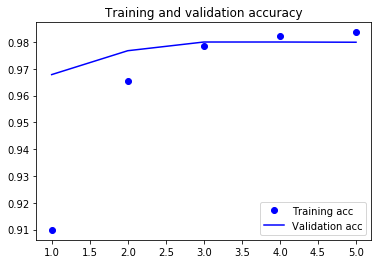

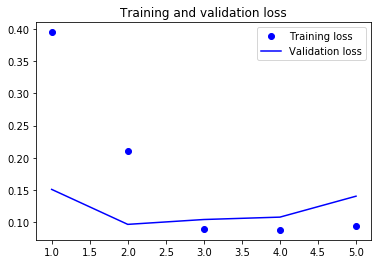

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


###Exercise 1:

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance.


In [0]:
#Modifiying the model from a relu activation function to a sigmoid function
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Adding a classifer on top of the convent
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='sigmoid'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [0]:
#Compile and evalute the model
model2.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(train_images, train_labels, epochs=6, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 47s 977us/step - loss: 0.9738 - acc: 0.6853 - val_loss: 0.2545 - val_acc: 0.9326
Epoch 2/6
48000/48000 [==============================] - 46s 957us/step - loss: 0.1936 - acc: 0.9458 - val_loss: 0.1423 - val_acc: 0.9608
Epoch 3/6
48000/48000 [==============================] - 46s 953us/step - loss: 0.1160 - acc: 0.9660 - val_loss: 0.1036 - val_acc: 0.9701
Epoch 4/6
48000/48000 [==============================] - 46s 964us/step - loss: 0.0858 - acc: 0.9747 - val_loss: 0.0705 - val_acc: 0.9792
Epoch 5/6
48000/48000 [==============================] - 46s 956us/step - loss: 0.0673 - acc: 0.9797 - val_loss: 0.0642 - val_acc: 0.9802
Epoch 6/6
48000/48000 [==============================] - 46s 959us/step - loss: 0.0552 - acc: 0.9831 - val_loss: 0.0561 - val_acc: 0.9838


In [0]:
#Evaluate the model
test2_loss, test2_acc = model2.evaluate(test_images, test_labels)
test2_acc

10000/10000 [==============================] - 3s 324us/step


0.9839

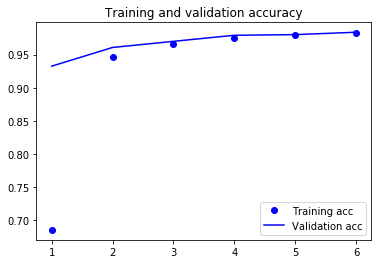

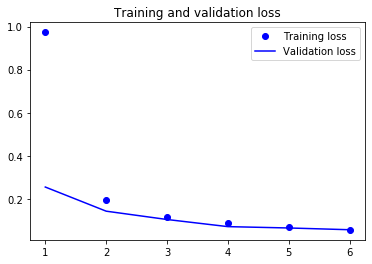

In [0]:
#Plots
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Part 2 (Dogs and Cats)

In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat. This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.

In [0]:
!pip install kaggle

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "aldavidv" # username from the json file
os.environ['KAGGLE_KEY'] = "700c7cf361bb7ae744c958f398f9d210" # key from the json file
!kaggle competitions download -c dogs-vs-cats # api copied from kaggle 

 98% 530M/543M [00:02<00:00, 232MB/s]
100% 543M/543M [00:03<00:00, 184MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 78.3MB/s]
100% 271M/271M [00:02<00:00, 135MB/s]
100% 271M/271M [00:02<00:00, 122MB/s]


In [0]:
# Upload data
from zipfile import ZipFile

file_name = "/content/train.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
data_dir_list = os.listdir('/content/train')
#print(data_dir_list)

path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [0]:
original_dataset_dir = '/content/train'
base_dir2 = '/content/cats_and_dogs_small'
os.mkdir(base_dir2)

FileExistsError: ignored

In [0]:
train_dir2 = os.path.join(base_dir2, 'train')
os.mkdir(train_dir2)

validation_dir2 = os.path.join(base_dir2, 'validation')
os.mkdir(validation_dir2)

test_dir2 = os.path.join(base_dir2, 'test')
os.mkdir(test_dir2)

train_cats_dir2 = os.path.join(train_dir2, 'cats')
os.mkdir(train_cats_dir2)

train_dogs_dir2 = os.path.join(train_dir2, 'dogs')
os.mkdir(train_dogs_dir2)

validation_cats_dir2 = os.path.join(validation_dir2, 'cats')
os.mkdir(validation_cats_dir2)

validation_dogs_dir2 = os.path.join(validation_dir2, 'dogs')
os.mkdir(validation_dogs_dir2)

test_cats_dir2 = os.path.join(test_dir2, 'cats')
os.mkdir(test_cats_dir2)

test_dogs_dir2 = os.path.join(test_dir2, 'dogs')
os.mkdir(test_dogs_dir2)


In [0]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir2, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir2, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir2, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir2, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir2, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir2, fname)
    shutil.copyfile(src, dst)

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
#from keras import layers
#from keras import models

modelp = models.Sequential()
modelp.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
modelp.add(layers.MaxPooling2D((2, 2)))
modelp.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelp.add(layers.MaxPooling2D((2, 2)))
modelp.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelp.add(layers.MaxPooling2D((2, 2)))
modelp.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelp.add(layers.MaxPooling2D((2, 2)))
modelp.add(layers.Flatten())
modelp.add(layers.Dense(512, activation='relu'))
modelp.add(layers.Dense(1, activation='sigmoid'))
modelp.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [0]:
from keras import optimizers
modelp.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


###Using ImageDataGenerator to read images from directories

As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating-point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator,which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
historyp = modelp.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/30





100/100 [==============================] - 19s 191ms/step - loss: 0.6865 - acc: 0.5405 - val_loss: 0.6880 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6548 - acc: 0.6085 - val_loss: 0.6811 - val_acc: 0.5550
Epoch 3/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6008 - acc: 0.6740 - val_loss: 0.5839 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5641 - acc: 0.7095 - val_loss: 0.6115 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5329 - acc: 0.7410 - val_loss: 0.5403 - val_acc: 0.7350
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5153 - acc: 0.7385 - val_loss: 0.6627 - val_acc: 0.6350
Epoch 7/30
100/100 [==============================] - 6s 60ms/step - loss: 0.4905 - acc: 0.7580 - val_loss: 0.5918 - val_acc: 0.6700
Epoch 8/30
100/100 [==============================] - 6s 60

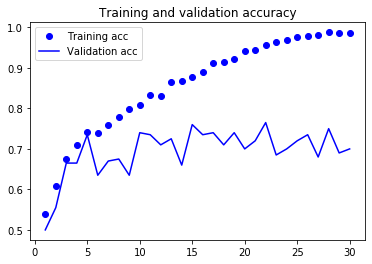

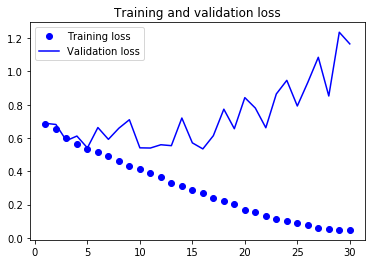

In [0]:
modelp.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

accp = historyp.history['acc']
val_accp = historyp.history['val_acc']
lossp = historyp.history['loss']
val_lossp = historyp.history['val_loss']

epochsp = range(1, len(accp) + 1)

plt.plot(epochsp, accp, 'bo', label='Training acc')
plt.plot(epochsp, val_accp, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochsp, lossp, 'bo', label='Training loss')
plt.plot(epochsp, val_lossp, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Convolutional Networks with Dropout


In [0]:
modelc = models.Sequential()
modelc.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
modelc.add(layers.MaxPooling2D((2, 2)))
modelc.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelc.add(layers.MaxPooling2D((2, 2)))
modelc.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelc.add(layers.MaxPooling2D((2, 2)))
modelc.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelc.add(layers.MaxPooling2D((2, 2)))
modelc.add(layers.Flatten())
modelc.add(layers.Dropout(0.5))
modelc.add(layers.Dense(512, activation='relu'))
modelc.add(layers.Dense(1, activation='sigmoid'))

modelc.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = modelc.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 28s 279ms/step - loss: 0.6943 - acc: 0.5047 - val_loss: 0.6878 - val_acc: 0.4981
Epoch 2/20
100/100 [==============================] - 25s 251ms/step - loss: 0.6825 - acc: 0.5559 - val_loss: 0.6677 - val_acc: 0.5921
Epoch 3/20
100/100 [==============================] - 25s 252ms/step - loss: 0.6724 - acc: 0.5806 - val_loss: 0.6456 - val_acc: 0.6339
Epoch 4/20
100/100 [==============================] - 25s 254ms/step - loss: 0.6529 - acc: 0.6084 - val_loss: 0.6325 - val_acc: 0.6308
Epoch 5/20
100/100 [==============================] - 24s 239ms/step - loss: 0.6313 - acc: 0.6300 - val_loss: 0.6142 - val_acc: 0.6593
Epoch 6/20
100/100 [==============================] - 27s 271ms/step - loss: 0.6145 - acc: 0.6547 - val_loss: 0.5949 - val_acc: 0.6765
Epoch 7/20
100/100 [==============================] - 25s 252ms/step - loss: 0.6052 - acc: 0.6694 - val_lo

##Part 3 (RNN)


In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [0]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Using word-embeddings

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


**Training the model with Embedding and SimpleRNN layers**


In [0]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.models import Sequential

modelr = Sequential()
modelr.add(Embedding(max_features, 32))
modelr.add(SimpleRNN(32))
modelr.add(Dense(1, activation='sigmoid'))
modelr.summary()
modelr.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = modelr.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.5700 - acc: 0.6989 - val_loss: 0.3956 - val_acc: 0.8336
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3487 - acc: 0.8549 - val_loss: 0.3984 - val_acc: 0.8228
Epoch 3/10
20000/20000 [==============================]

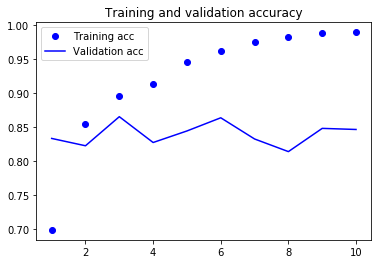

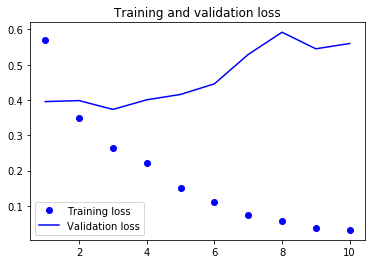

In [0]:
#import matplotlib.pyplot as plt

accr = history.history['acc']
val_accr = history.history['val_acc']
lossr = history.history['loss']
val_lossr = history.history['val_loss']

epochsr = range(1, len(accr) + 1)

plt.plot(epochsr, accr, 'bo', label='Training acc')
plt.plot(epochsr, val_accr, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochsr, lossr, 'bo', label='Training loss')
plt.plot(epochsr, val_lossr, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Training the model with Embedding and SimpleRNN layers**


In [0]:
from keras.layers import LSTM

modele = Sequential()
modele.add(Embedding(max_features, 32))
modele.add(LSTM(32))
modele.add(Dense(1, activation='sigmoid'))
modele.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
historye = modele.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 102s 5ms/step - loss: 0.4972 - acc: 0.7662 - val_loss: 0.3791 - val_acc: 0.8430
Epoch 2/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.3086 - acc: 0.8807 - val_loss: 0.3639 - val_acc: 0.8544
Epoch 3/10
20000/20000 [==============================] - 102s 5ms/step - loss: 0.2318 - acc: 0.9147 - val_loss: 0.3892 - val_acc: 0.8536
Epoch 4/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.2009 - acc: 0.9257 - val_loss: 0.3461 - val_acc: 0.8850
Epoch 5/10
20000/20000 [==============================] - 102s 5ms/step - loss: 0.1761 - acc: 0.9352 - val_loss: 0.3339 - val_acc: 0.8812
Epoch 6/10
20000/20000 [==============================] - 102s 5ms/step - loss: 0.1573 - acc: 0.9427 - val_loss: 0.3061 - val_acc: 0.8850
Epoch 7/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.1416 - acc: 0.9489 - val_loss: 0.3358 - v

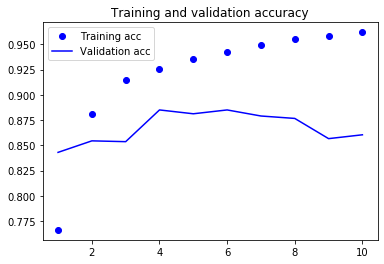

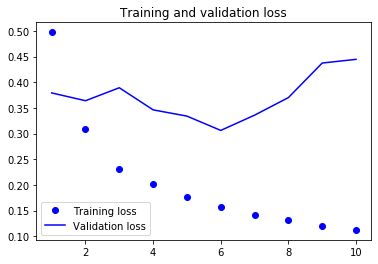

In [0]:
#import matplotlib.pyplot as plt

acce = historye.history['acc']
val_acce = historye.history['val_acc']
losse = historye.history['loss']
val_losse = historye.history['val_loss']

epochse = range(1, len(acce) + 1)

plt.plot(epochse, acce, 'bo', label='Training acc')
plt.plot(epochse, val_acce, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochse, losse, 'bo', label='Training loss')
plt.plot(epochse, val_losse, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Part 4


In [1]:
import os
os.getcwd()

'/content'

Downlaod images as data from Kaggle, and build a CNN

In [2]:
#Upload the data
# Upload data
from zipfile import ZipFile

file_name = "/content/Archivo.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
data_dir_list = os.listdir('/content')
#print(data_dir_list2)

#Number of files paper
path, dirs, files = next(os.walk("/content/paper"))
file_count = len(files)
print(file_count)

712


In [4]:
#Number of files rock
path2, dirs2, files2 = next(os.walk("/content/rock"))
file_count2 = len(files2)
print(file_count2)

726


In [5]:
#Number of files scissor
path3, dirs3, files3 = next(os.walk("/content/scissors"))
file_count3 = len(files3)
print(file_count3)

750


In [0]:
original_dataset_dir2 = '/content'
base_dir = '/content/rock_paper_scissor_small4'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_rock_dir = os.path.join(train_dir, 'rock')
os.mkdir(train_rock_dir)

train_scissor_dir = os.path.join(train_dir, 'scissor')
os.mkdir(train_scissor_dir)

train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

validation_rock_dir = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock_dir)

validation_scissor_dir = os.path.join(validation_dir, 'scissor')
os.mkdir(validation_scissor_dir)

validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

test_rock_dir = os.path.join(test_dir, 'rock')
os.mkdir(test_rock_dir)

test_scissor_dir = os.path.join(test_dir, 'scissor')
os.mkdir(test_scissor_dir)

test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)

In [0]:
#Rename the paper file

i = 0

for filename in os.listdir('/content/paper'): 
  dst ="paper" + str(i) + ".jpg"
  src = filename  #'/content/paper1' + 
  #dst ='/content/paper'+ dst 
  # rename() function will 
  # rename all the files 
  #os.rename(src, dst) 
  
  old_file = os.path.join('/content/paper', filename)
  new_file = os.path.join('/content/paper', dst)
  os.rename(old_file, new_file)
  i += 1

In [0]:
#Rename the rock file

i = 0

for filename in os.listdir('/content/rock'): 
  dst ="rock" + str(i) + ".jpg"
  src = filename  #'/content/paper1' + 
  #dst ='/content/paper'+ dst 
  # rename() function will 
  # rename all the files 
  #os.rename(src, dst) 
  
  old_file = os.path.join('/content/rock', filename)
  new_file = os.path.join('/content/rock', dst)
  os.rename(old_file, new_file)
  i += 1

In [0]:
#Rename the scissor file

i = 0

for filename in os.listdir('/content/scissors'): 
  dst ="scissor" + str(i) + ".jpg"
  src = filename  #'/content/paper1' + 
  #dst ='/content/paper'+ dst 
  # rename() function will 
  # rename all the files 
  #os.rename(src, dst) 
  
  old_file = os.path.join('/content/scissors', filename)
  new_file = os.path.join('/content/scissors', dst)
  os.rename(old_file, new_file)
  i += 1

In [0]:
import shutil
fnames = ['rock{}.jpg'.format(i) for i in range(508)]
for fname in fnames:
    src = os.path.join('/content/rock', fname)
    dst = os.path.join('/content/rock_paper_scissor_small4/train/rock', fname)
    #print(src,dst)
    shutil.copyfile(src, dst)

fnames = ['rock{}.jpg'.format(i) for i in range(508, 617)]
for fname in fnames:
    src = os.path.join('/content/rock', fname)
    dst = os.path.join('/content/rock_paper_scissor_small4/validation/rock', fname)
    shutil.copyfile(src, dst)

fnames = ['rock{}.jpg'.format(i) for i in range(617, 726)]
for fname in fnames:
    src = os.path.join('/content/rock', fname)
    dst = os.path.join('/content/rock_paper_scissor_small4/test/rock', fname)
    shutil.copyfile(src, dst)
    

fnames = ['scissor{}.jpg'.format(i) for i in range(525)]
for fname in fnames:
    src = os.path.join('/content/scissors', fname)
    dst = os.path.join('/content/rock_paper_scissor_small4/train/scissor', fname)
    shutil.copyfile(src, dst)

fnames = ['scissor{}.jpg'.format(i) for i in range(525, 638)]
for fname in fnames:
    src = os.path.join('/content/scissors', fname)
    dst = os.path.join('/content/rock_paper_scissor_small4/validation/scissor', fname)
    shutil.copyfile(src, dst)

fnames = ['scissor{}.jpg'.format(i) for i in range(638, 750)]
for fname in fnames:
    src = os.path.join('/content/scissors', fname)
    dst = os.path.join('/content/rock_paper_scissor_small4/test/scissor', fname)
    shutil.copyfile(src, dst)



In [0]:
fnames = ['paper{}.jpg'.format(i) for i in range(498)]
for fname in fnames:
    src = os.path.join('/content/paper', fname)
    dst = os.path.join('/content/rock_paper_scissor_small4/train/paper', fname)
    shutil.copyfile(src, dst)

fnames = ['paper{}.jpg'.format(i) for i in range(498, 605)]
for fname in fnames:
  src = os.path.join('/content/paper', fname)
  dst = os.path.join('/content/rock_paper_scissor_small4/validation/paper', fname)
  shutil.copyfile(src, dst)

fnames = ['paper{}.jpg'.format(i) for i in range(605, 712)]
for fname in fnames:
    src = os.path.join('/content/paper', fname)
    dst = os.path.join('/content/rock_paper_scissor_small4/test/paper', fname)
    shutil.copyfile(src, dst)

In [15]:
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training scissor images:', len(os.listdir(train_scissor_dir)))

print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation scissor images:', len(os.listdir(validation_scissor_dir)))

print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test rock images:', len(os.listdir(test_rock_dir)))
print('total test scissor images:', len(os.listdir(test_scissor_dir)))

total training paper images: 498
total training rock images: 508
total training scissor images: 525
total validation paper images: 107
total validation rock images: 109
total validation scissor images: 113
total test paper images: 197
total test rock images: 109
total test scissor images: 112


In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [17]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1531 images belonging to 3 classes.
Found 329 images belonging to 3 classes.


In [19]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)




Epoch 1/30





100/100 [==============================] - 19s 195ms/step - loss: 0.0793 - acc: 0.3317 - val_loss: -0.1594 - val_acc: 0.3000
Epoch 2/30
100/100 [==============================] - 5s 55ms/step - loss: -0.7362 - acc: 0.3221 - val_loss: -0.0844 - val_acc: 0.3810
Epoch 3/30
100/100 [==============================] - 5s 53ms/step - loss: -0.4756 - acc: 0.3445 - val_loss: -2.1831 - val_acc: 0.3350
Epoch 4/30
100/100 [==============================] - 6s 58ms/step - loss: -3.7367 - acc: 0.4519 - val_loss: -5.1052 - val_acc: 0.4286
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: -4.2113 - acc: 0.5093 - val_loss: -4.1541 - val_acc: 0.5350
Epoch 6/30
100/100 [==============================] - 6s 57ms/step - loss: -4.7672 - acc: 0.5377 - val_loss: -3.9980 - val_acc: 0.5714
Epoch 7/30
100/100 [==============================] - 5s 53ms/step - loss: -4.7147 - acc: 0.5671 - val_loss: -5.1936 - val_acc: 0.5079
Epoch 8/30
100/100 [==========================

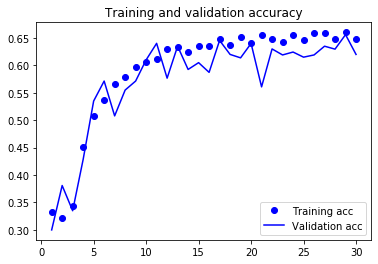

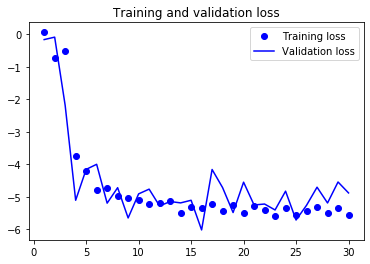

In [20]:
model.save('rock_paper_scissor_small.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

###Dropout

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)


Found 1531 images belonging to 3 classes.
Found 329 images belonging to 3 classes.
Epoch 1/20
100/100 [==============================] - 27s 265ms/step - loss: -0.2232 - acc: 0.3326 - val_loss: -0.2326 - val_acc: 0.3289
Epoch 2/20
100/100 [==============================] - 23s 235ms/step - loss: -0.3238 - acc: 0.3277 - val_loss: -0.3543 - val_acc: 0.3313
Epoch 3/20
100/100 [==============================] - 24s 237ms/step - loss: -0.2373 - acc: 0.3397 - val_loss: -0.3912 - val_acc: 0.3309
Epoch 4/20
100/100 [==============================] - 24s 236ms/step - loss: -0.3022 - acc: 0.3250 - val_loss: -0.2147 - val_acc: 0.3320
Epoch 5/20
100/100 [==============================] - 24s 237ms/step - loss: -0.2111 - acc: 0.3349 - val_loss: -0.2854 - val_acc: 0.3349
Epoch 6/20
100/100 [==============================] - 24s 236ms/step - loss: -0.4198 - acc: 0.3272 - val_loss: -0.2469 - val_acc: 0.3286
Epoch 7/20
100/100 [==============================] - 24s 239ms/step - loss: -0.0906 - acc: 0.3